In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autotime
pd.set_option('display.max_columns', 65)

# Read in data and prepare target variable

In [2]:
df = pd.read_csv("usa_small.csv")
df = df.reindex(columns=(['MARST'] + list([a for a in df.columns if a != 'MARST']) ))

time: 33.5 s


In [3]:
df = df[df['MARST'].isin([1,3,4])]

df['MARST'] = df['MARST'].replace(1,0)
df['MARST'] = df['MARST'].replace([3,4],1)

time: 2.19 s


In [4]:
counts = df["MARST"].value_counts()
multiplier = counts[0]/counts[1]

time: 54.3 ms


# Filter out entries with revealing information

In [5]:
df = df[(df["FERTYR"]!=8)]
df = df[(df["NCOUPLES"]!=0)]
df = df[(df["FAMSIZE"]!=1)]
df = df[~df["MARRNO_SP"].isna()]
df = df[df["MARRNO_SP"] != 0]
df = df[df["EMPSTAT"] != 0]

time: 4.93 s


# Resample to keep same distribution

In [6]:
num_married_sample = int(df["MARST"].value_counts()[1]*multiplier)

married = df[df["MARST"]==0].sample(n=num_married_sample, random_state=13)

df = df[df["MARST"]==1].append(married)

time: 879 ms


# EDA and Visualizations

In [53]:
df["YEARS_MARRIED"] = df["YEAR"] - df["YRMARR"]

time: 40 ms


In [117]:
state_codes = pd.read_excel("variable_codes/state_codes.xlsx", header=None)
df.STATEFIP = df.STATEFIP.replace(np.array(state_codes[0]), np.array(state_codes[1]))

occupation_codes = pd.read_excel("variable_codes/occupation_codes.xlsx")
df.OCC2010 = df.OCC2010.replace(np.array(occupation_codes["Value"]), np.array(occupation_codes["Label"]))

race_codes = pd.read_excel("variable_codes/race_codes.xlsx", header=None)
df.RACE = df.RACE.replace(np.array(race_codes[0]), np.array(race_codes[1]))

time: 1.56 s


In [153]:
only_popular_occupations = df[df.OCC2010.isin(df.OCC2010.value_counts().index[df.OCC2010.value_counts() > 100])]
occupation_divorce_rates = only_popular_occupations.groupby("OCC2010").mean()["MARST"].sort_values(ascending=False)

time: 509 ms


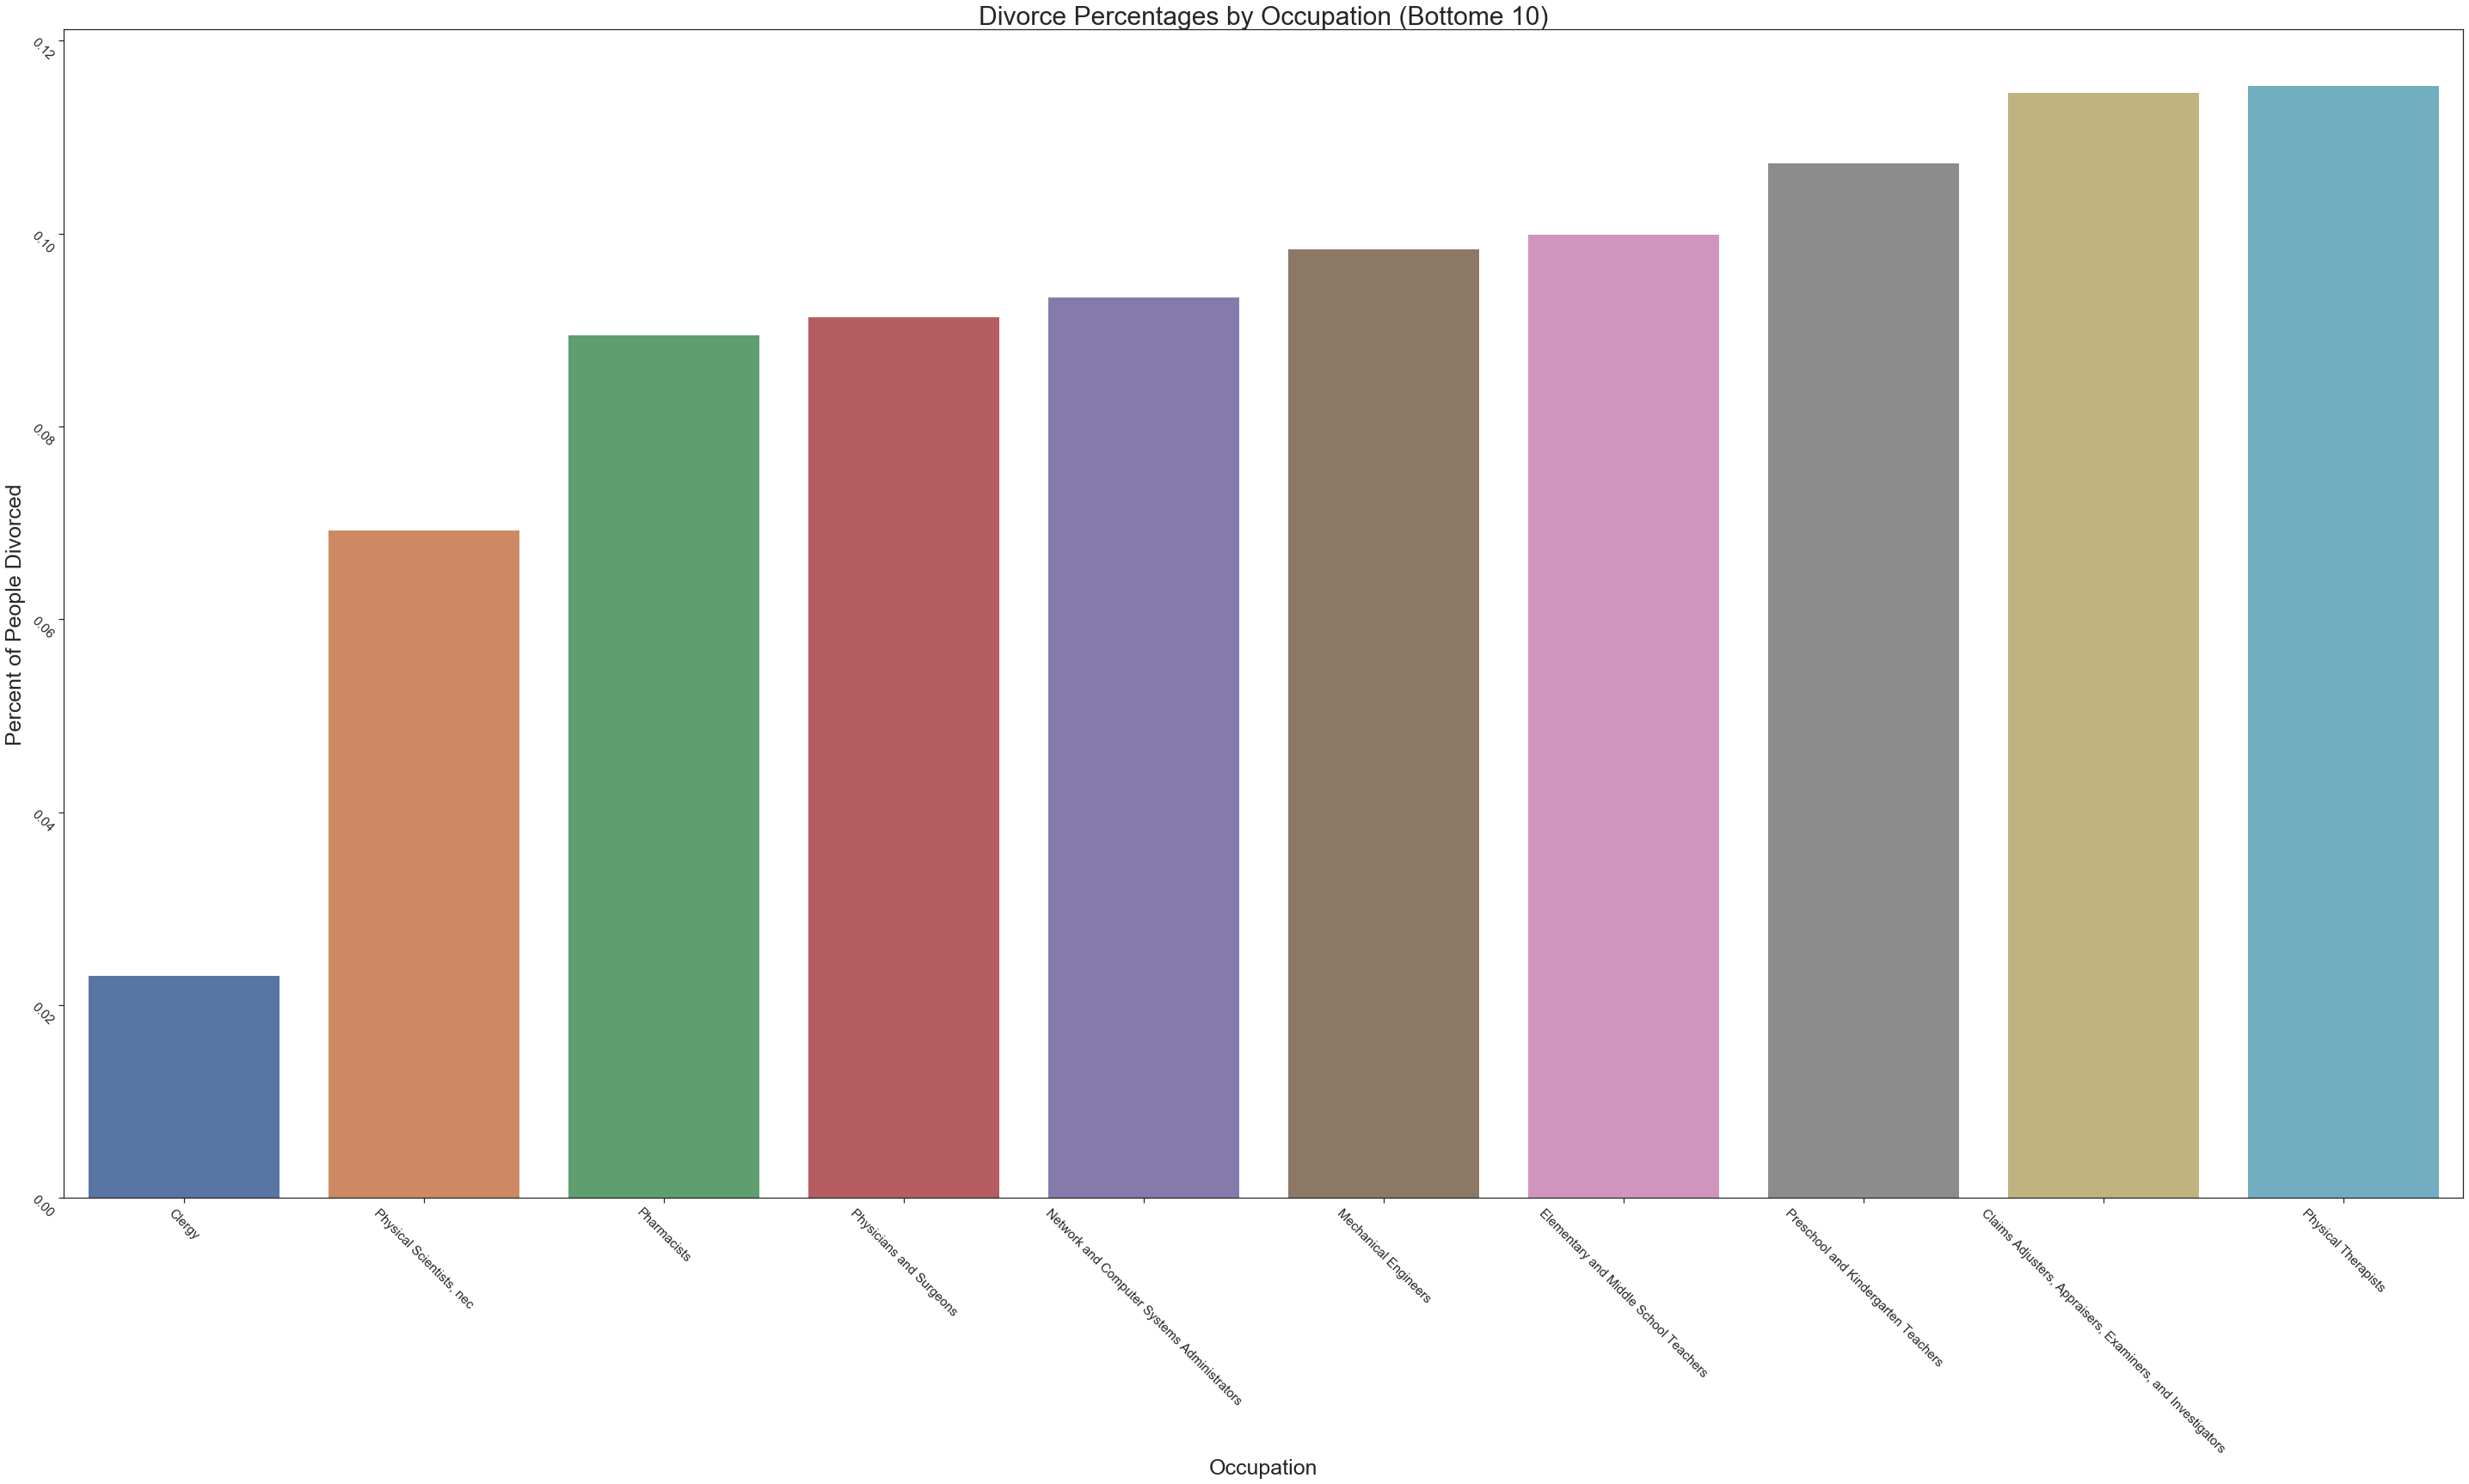

time: 3.53 s


In [155]:
occupation_bottom_groups = df[df.OCC2010.isin(occupation_divorce_rates[-10:].index)].groupby("OCC2010").mean()['MARST'].sort_values(ascending=False)
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(50, 25))
plot = sns.barplot(occupation_bottom_groups.index, occupation_bottom_groups, order=reversed(occupation_bottom_groups.index))
plot.set_xlabel("Occupation",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Occupation (Bottome 10)", fontsize=30)
plot.tick_params(labelsize=15, rotation=-45)

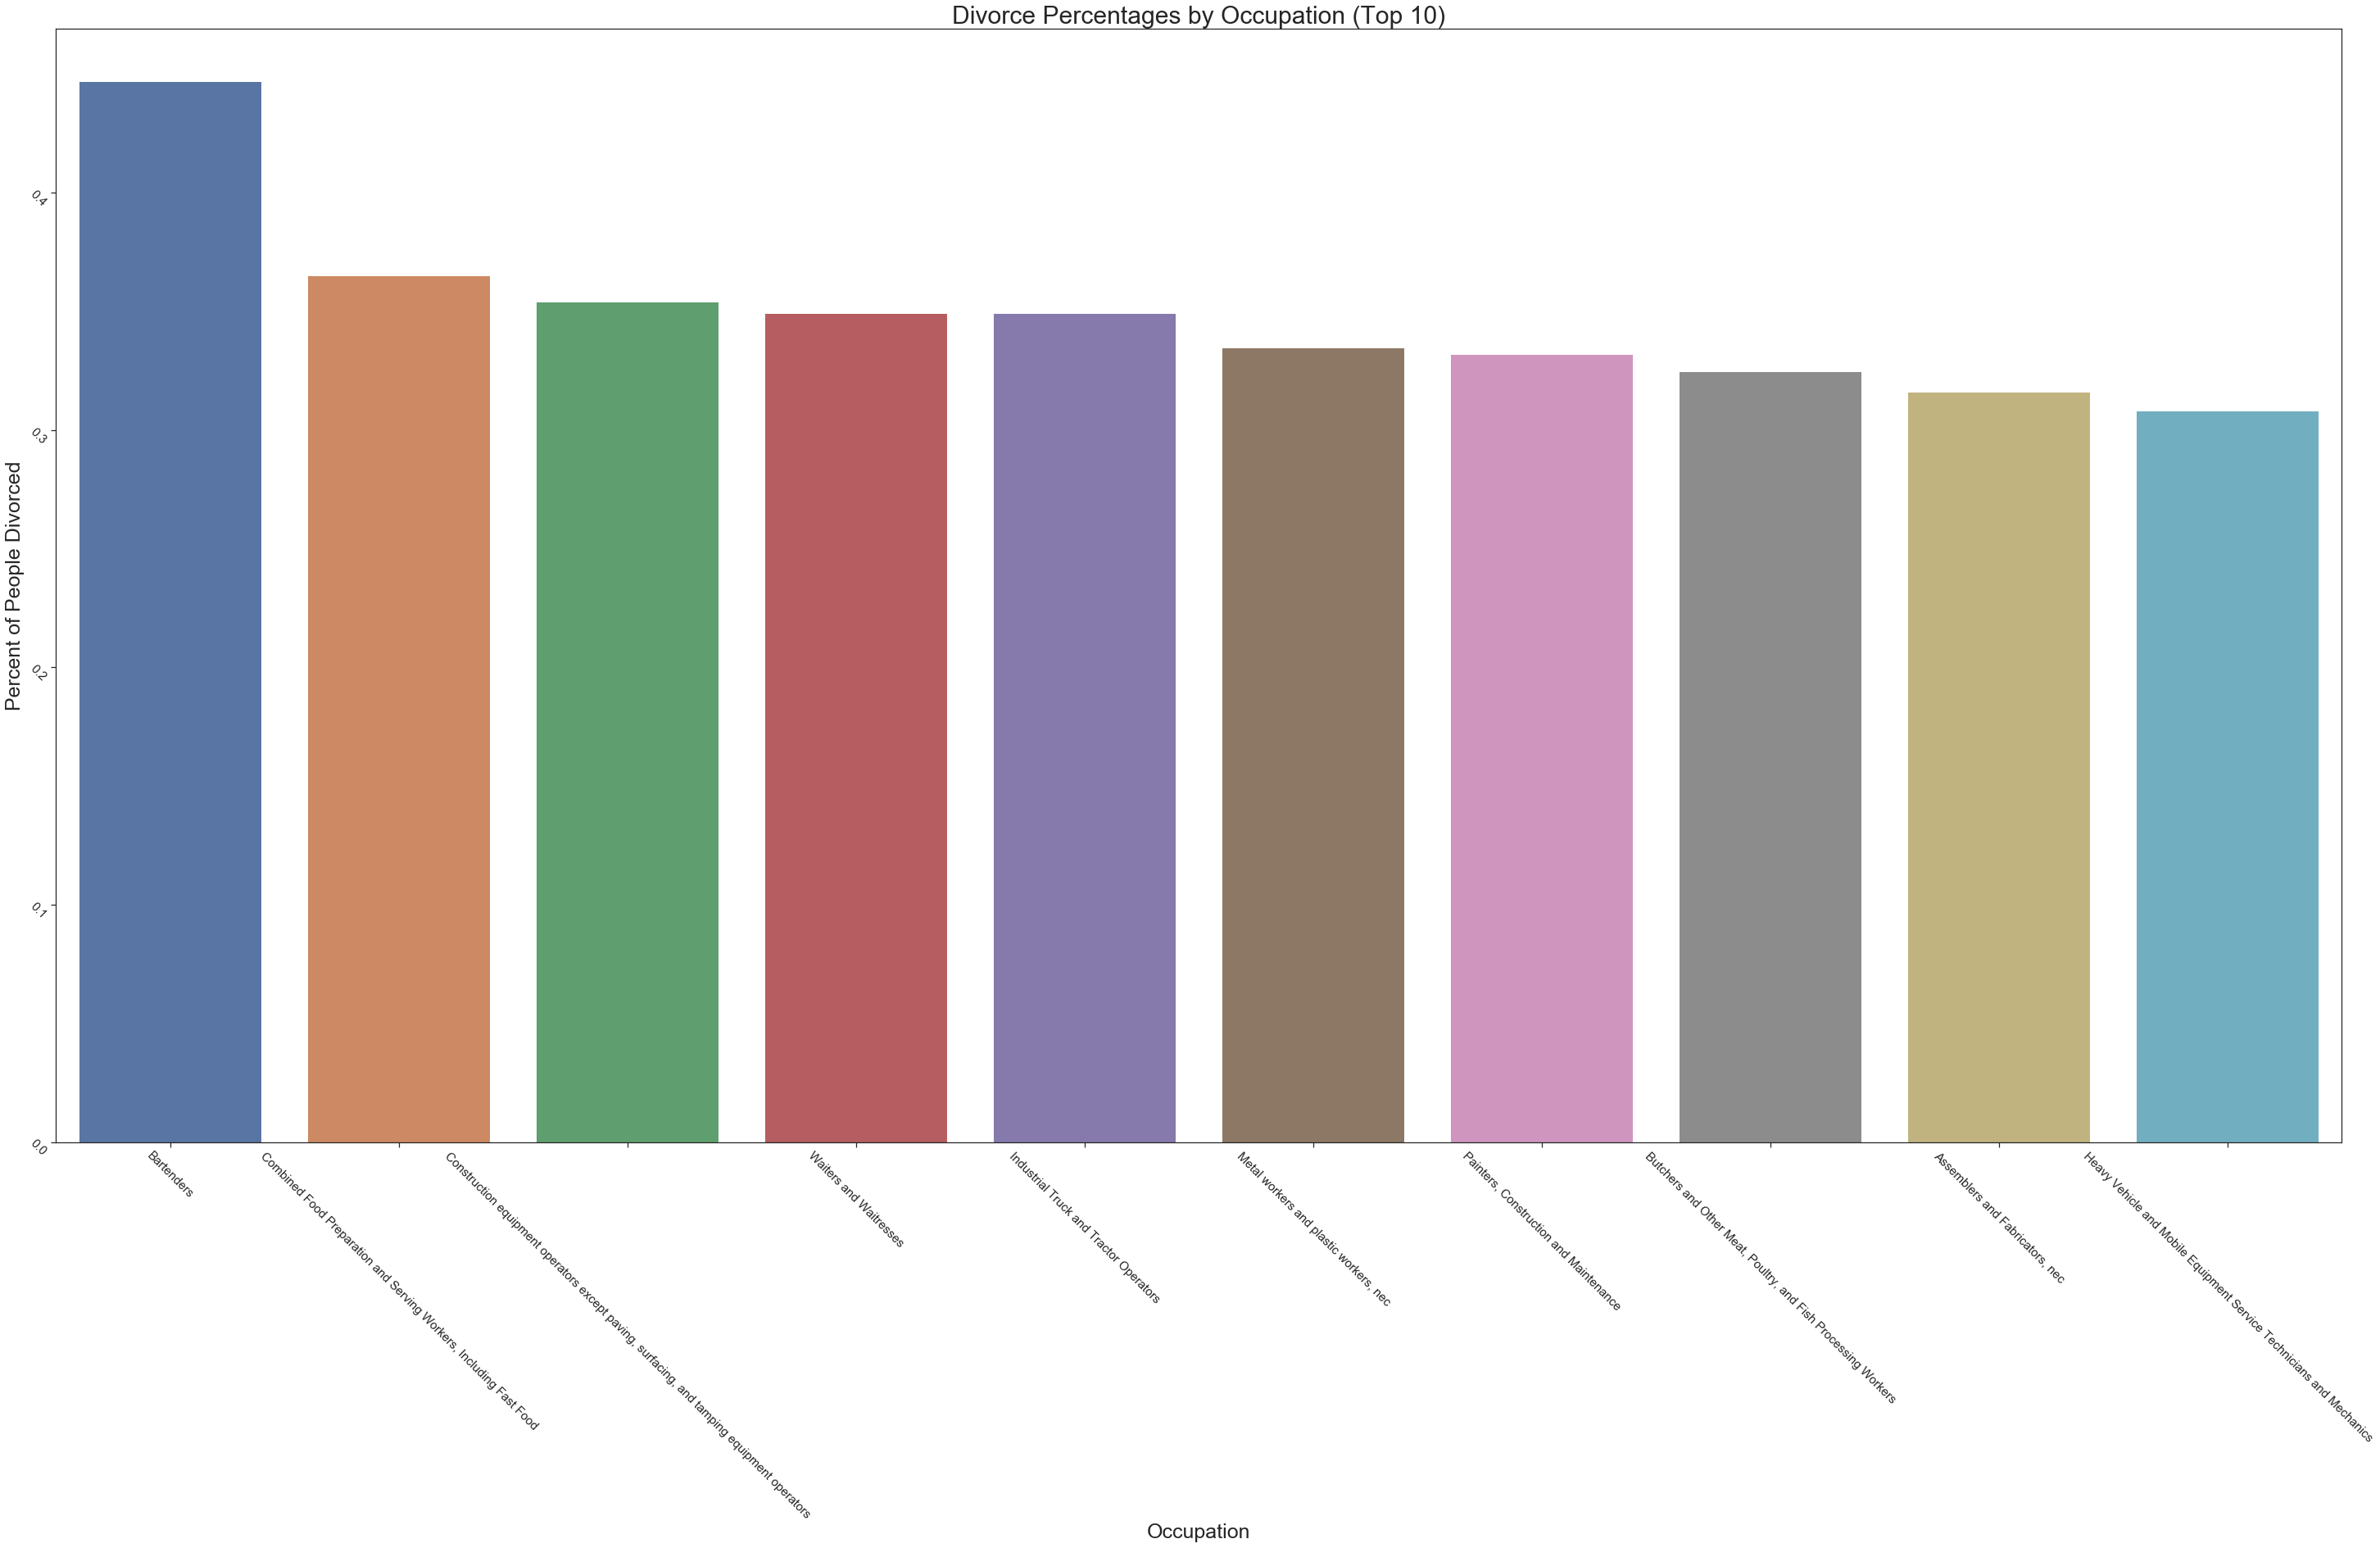

time: 3.84 s


In [156]:
occupation_top_groups = df[df.OCC2010.isin(occupation_divorce_rates[:10].index)].groupby("OCC2010").mean()['MARST'].sort_values(ascending=False)
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(50, 25))
plot = sns.barplot(occupation_top_groups.index, occupation_top_groups)
plot.set_xlabel("Occupation",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Occupation (Top 10)", fontsize=30)
plot.tick_params(labelsize=15, rotation=-45)

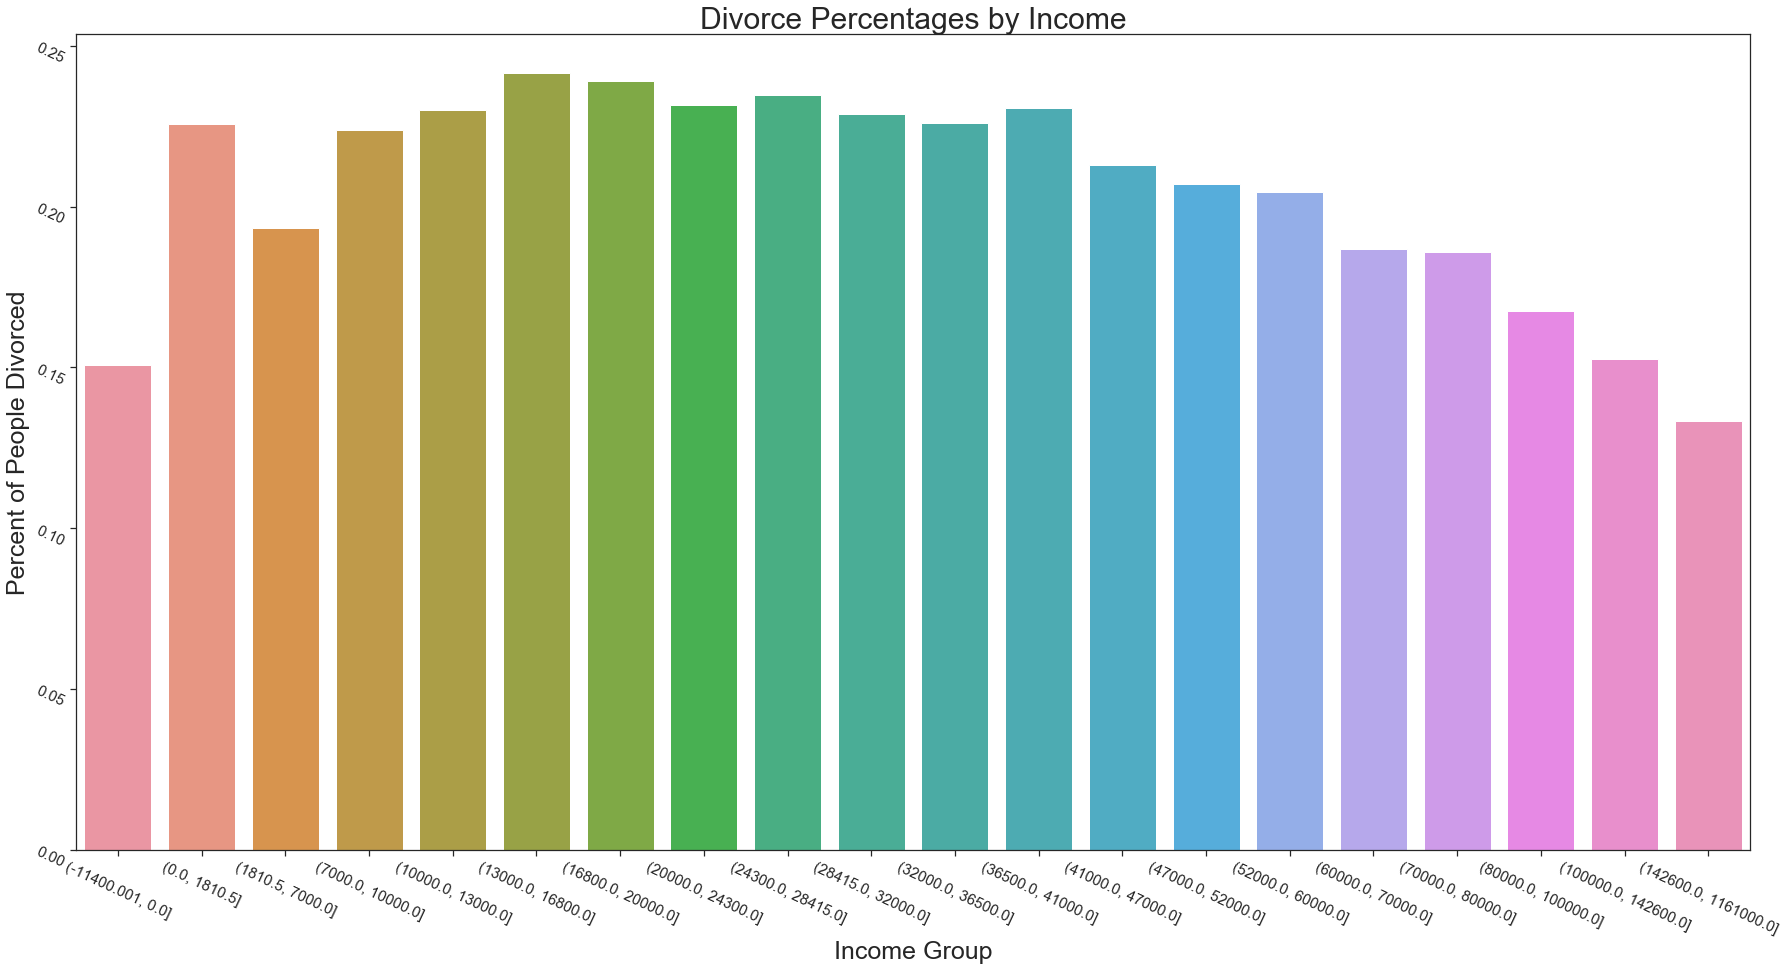

time: 3.9 s


In [124]:
df['IncomeGroup'] = pd.qcut(df['INCTOT'], 20)
income_groups = df.groupby("IncomeGroup").mean()['MARST']
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(income_groups.index, income_groups)
plot.set_xlabel("Income Group",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Income", fontsize=30)
plot.tick_params(labelsize=15,rotation=-25)

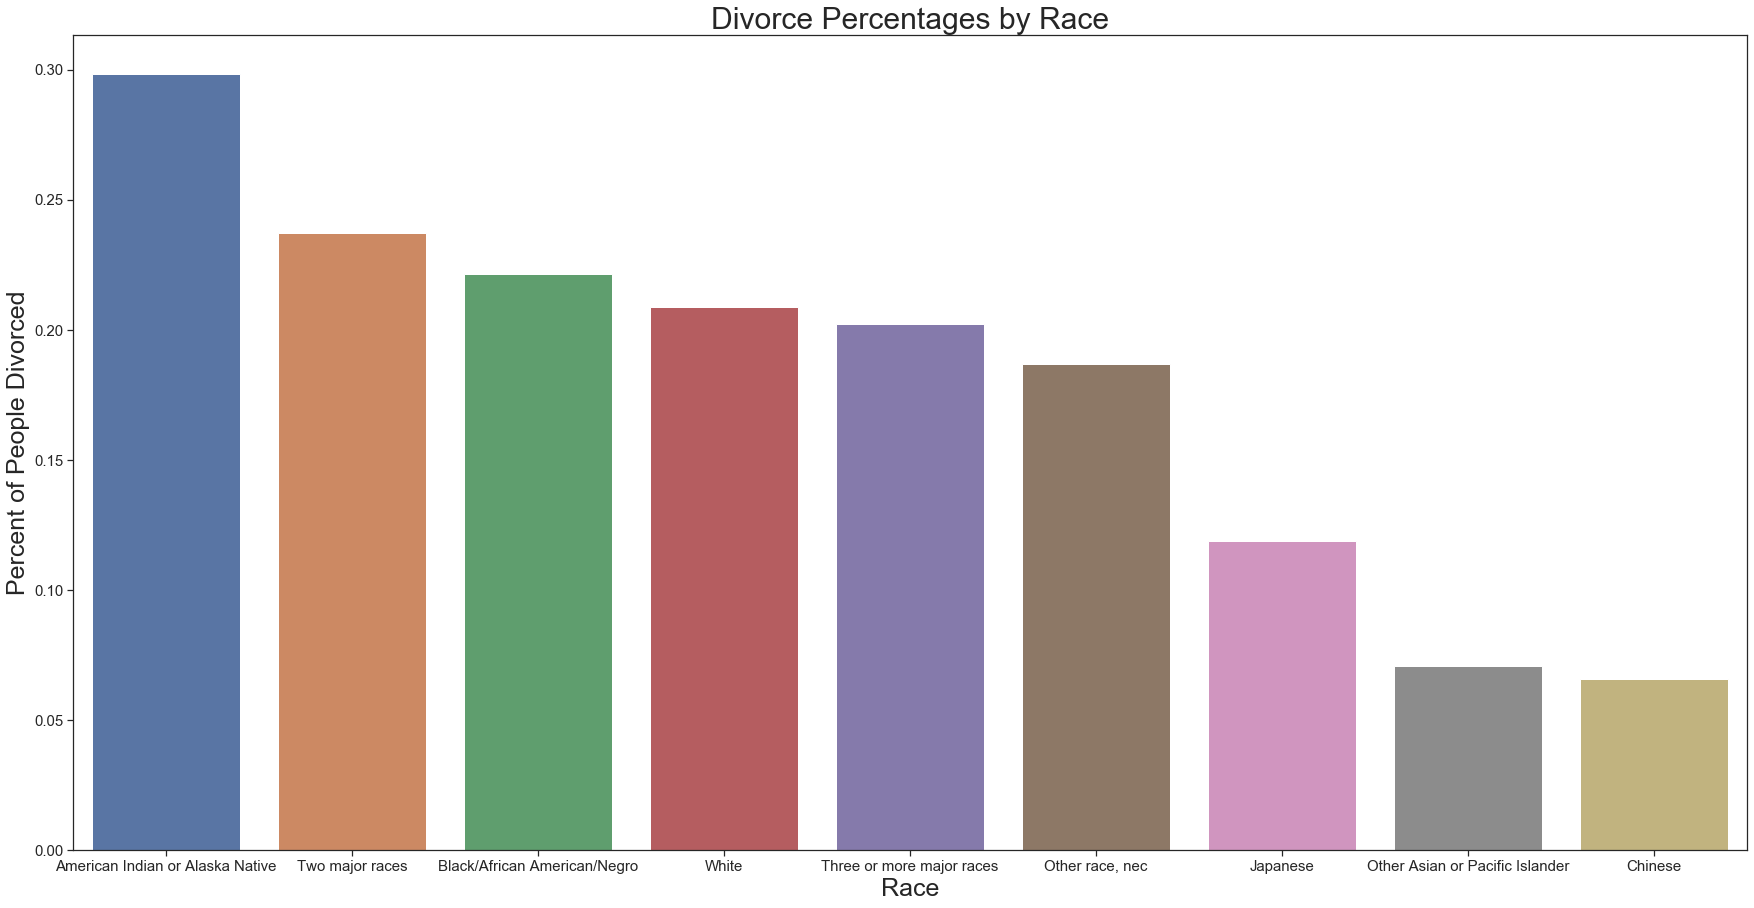

time: 2.38 s


In [125]:
race_groups = df.groupby("RACE").mean()['MARST'].sort_values(ascending=False)
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(race_groups.index, race_groups)
plot.set_xlabel("Race",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Race", fontsize=30)
plot.tick_params(labelsize=15)

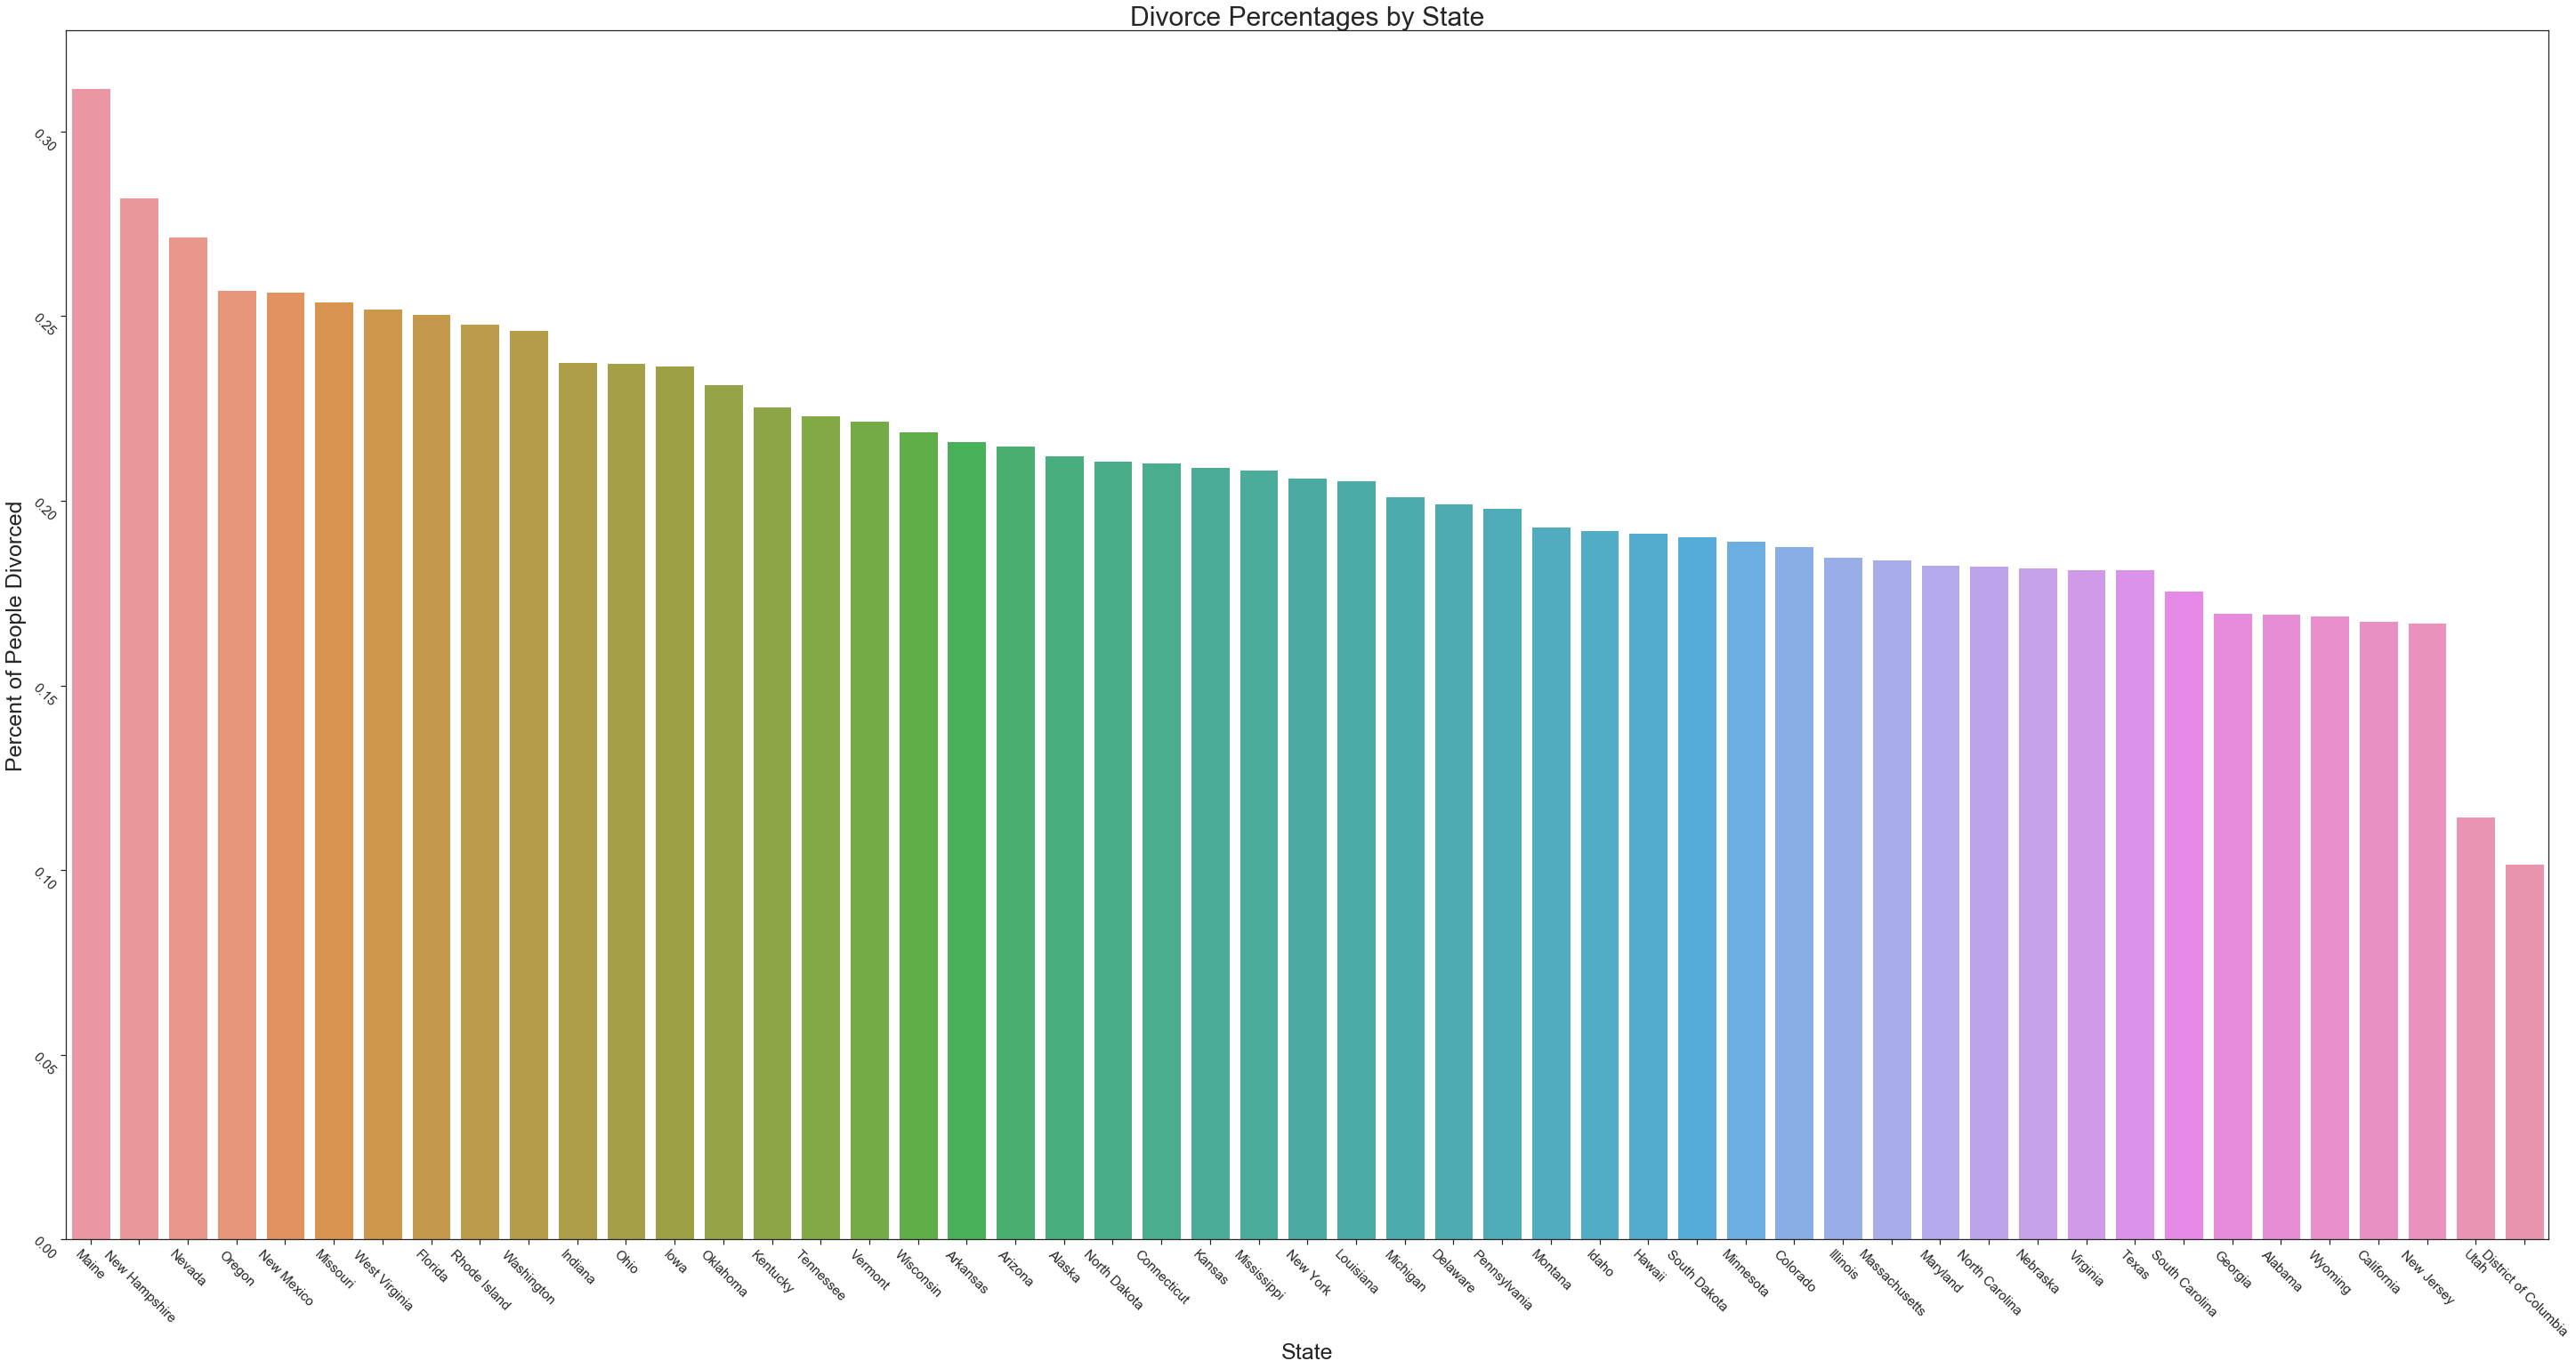

time: 5.04 s


In [126]:
state_groups = df.groupby("STATEFIP").mean()['MARST'].sort_values(ascending=False)
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(50, 25))
plot = sns.barplot(state_groups.index, state_groups, order=state_groups.index)
plot.set_xlabel("State",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by State", fontsize=30)
plot.tick_params(labelsize=15,rotation=-45)

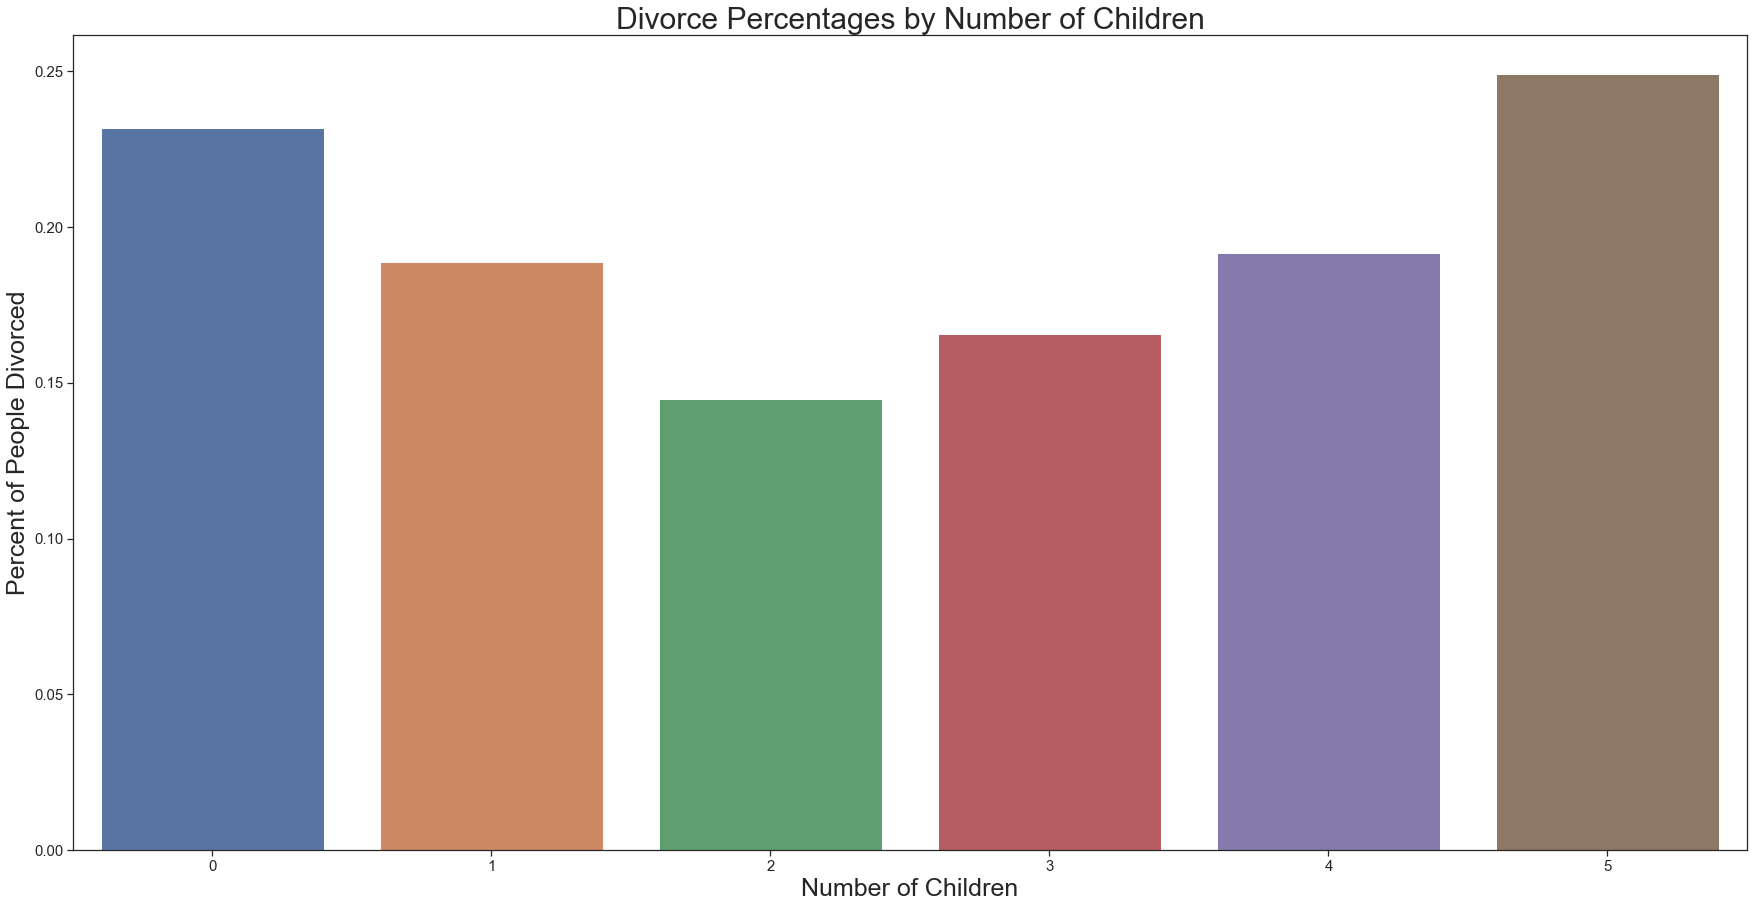

time: 2.24 s


In [127]:
number_of_children_groups = df.groupby("NCHILD").mean()['MARST']
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(number_of_children_groups.index[:6], number_of_children_groups[:6])
plot.set_xlabel("Number of Children",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Number of Children", fontsize=30)
plot.tick_params(labelsize=15)

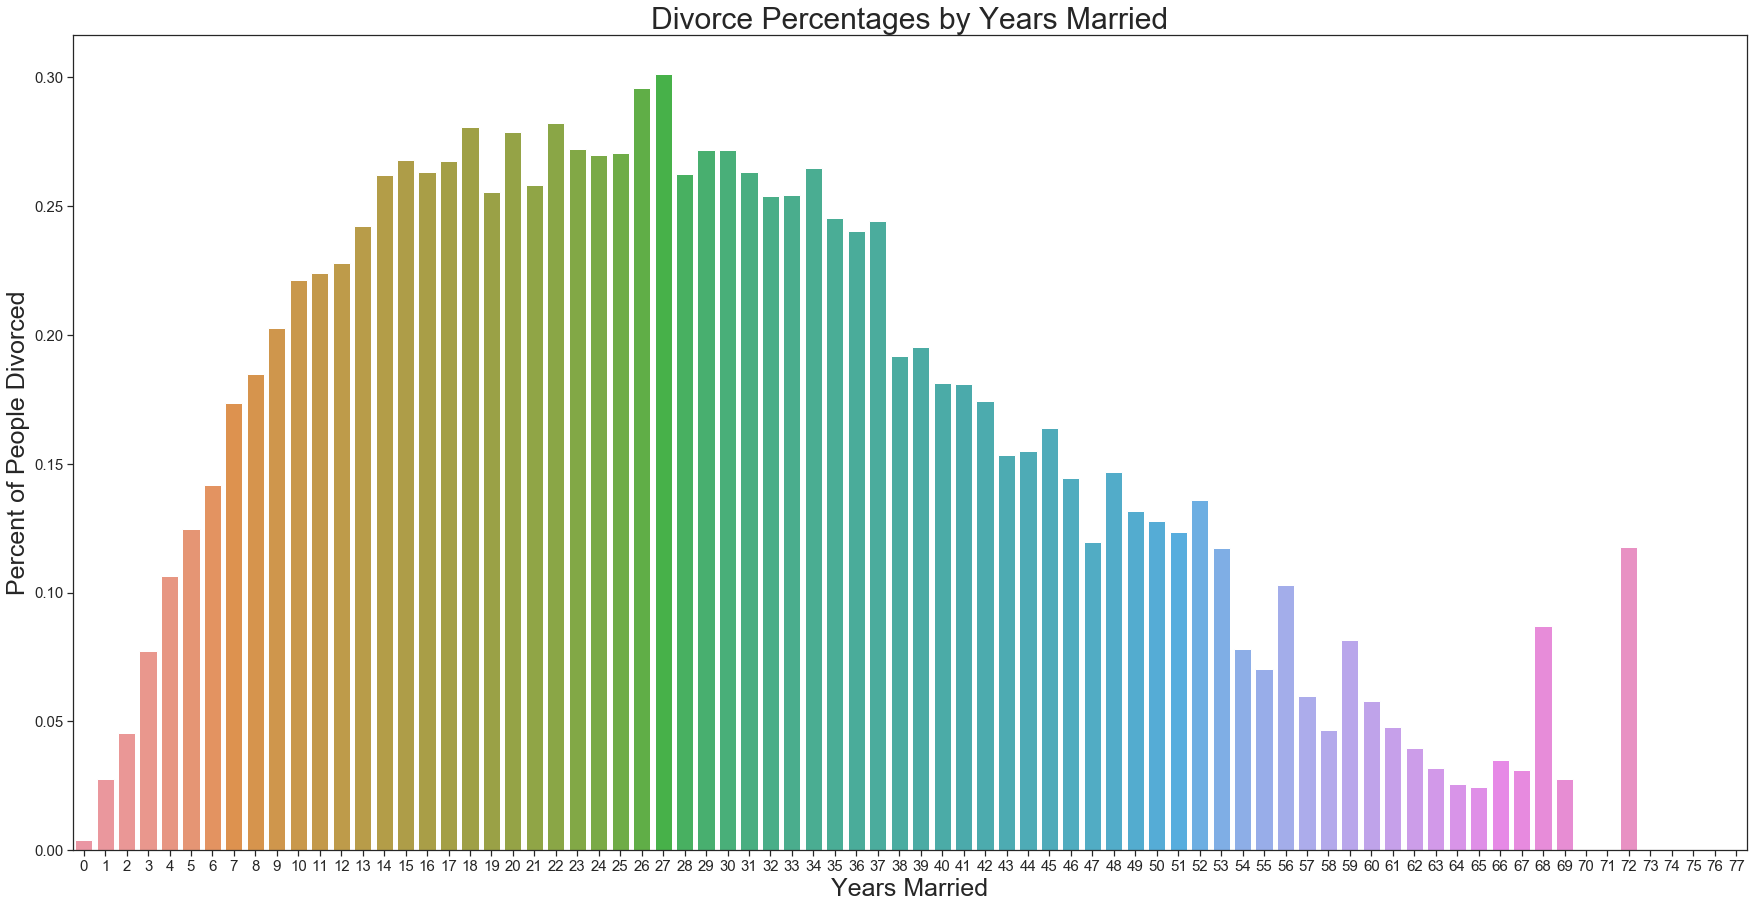

time: 3.78 s


In [128]:
years_married_groups = df.groupby("YEARS_MARRIED").mean()['MARST']
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(years_married_groups.index, years_married_groups)
plot.set_xlabel("Years Married",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Years Married", fontsize=30)
plot.tick_params(labelsize=15)

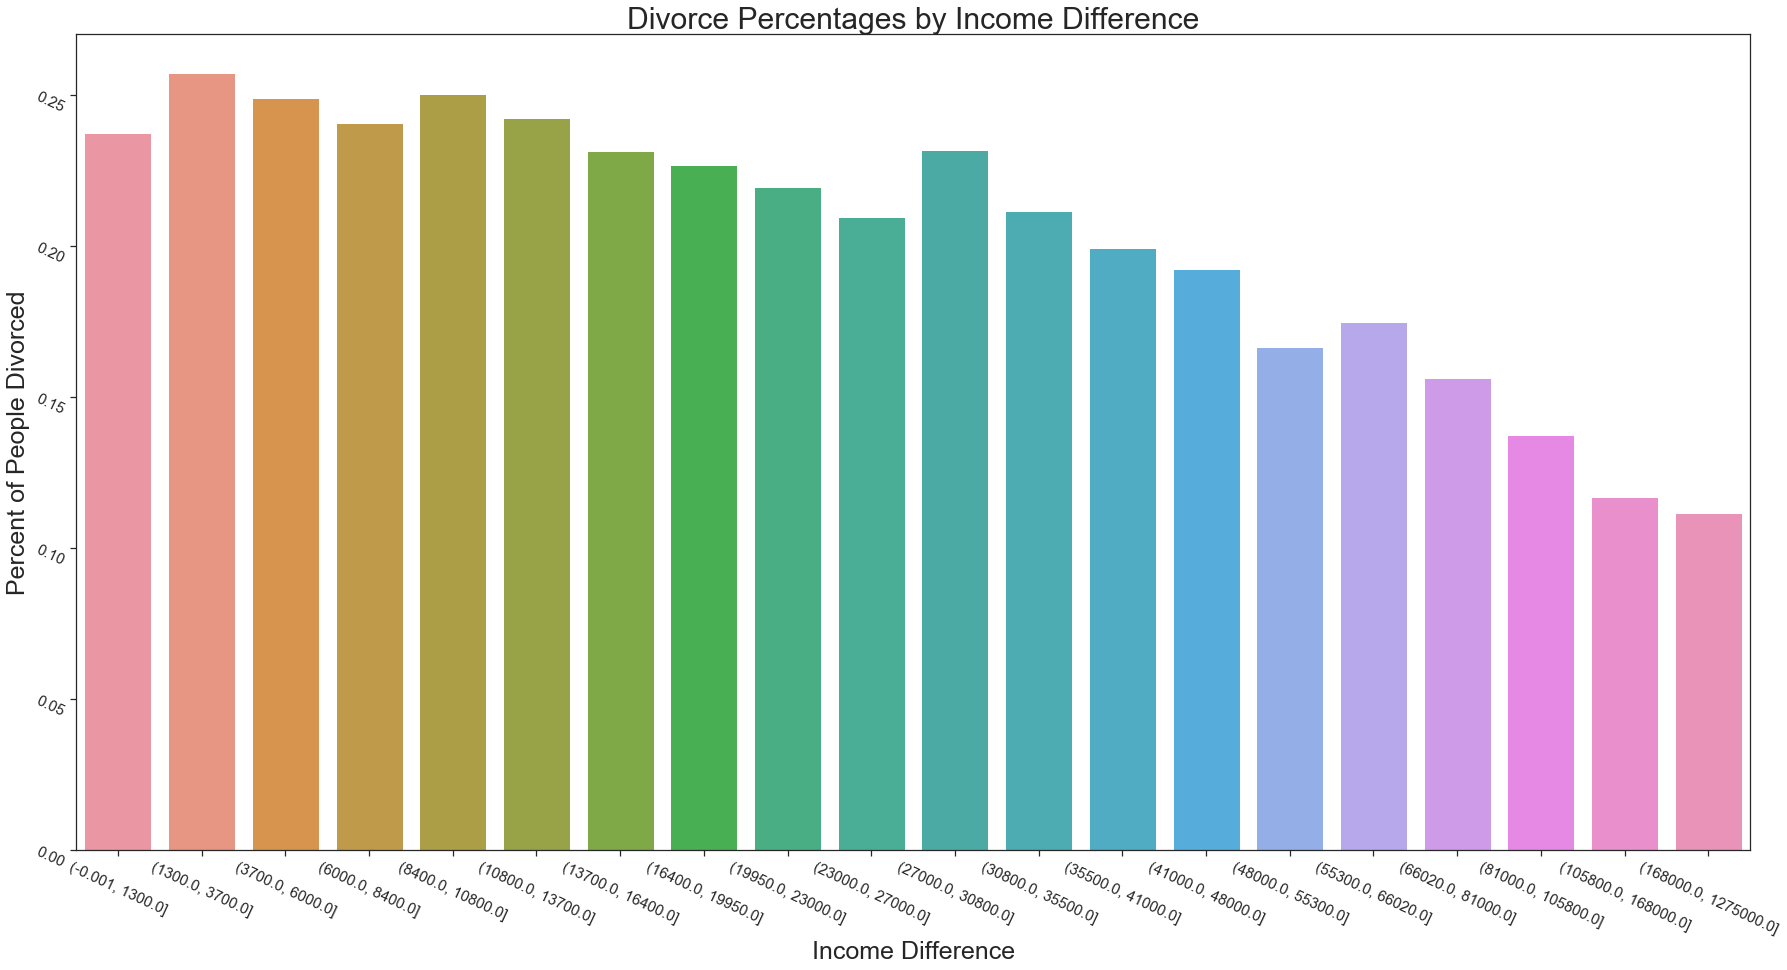

time: 5.88 s


In [136]:
df["income_diff"] = abs(df["INCTOT"] - df["INCTOT_SP"])
df['income_diff'] = pd.qcut(df['income_diff'], 20)
income_diff_groups = df.groupby("income_diff").mean()['MARST']
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(income_diff_groups.index, income_diff_groups)
plot.set_xlabel("Income Difference",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Income Difference", fontsize=30)
plot.tick_params(labelsize=15, rotation=-25)

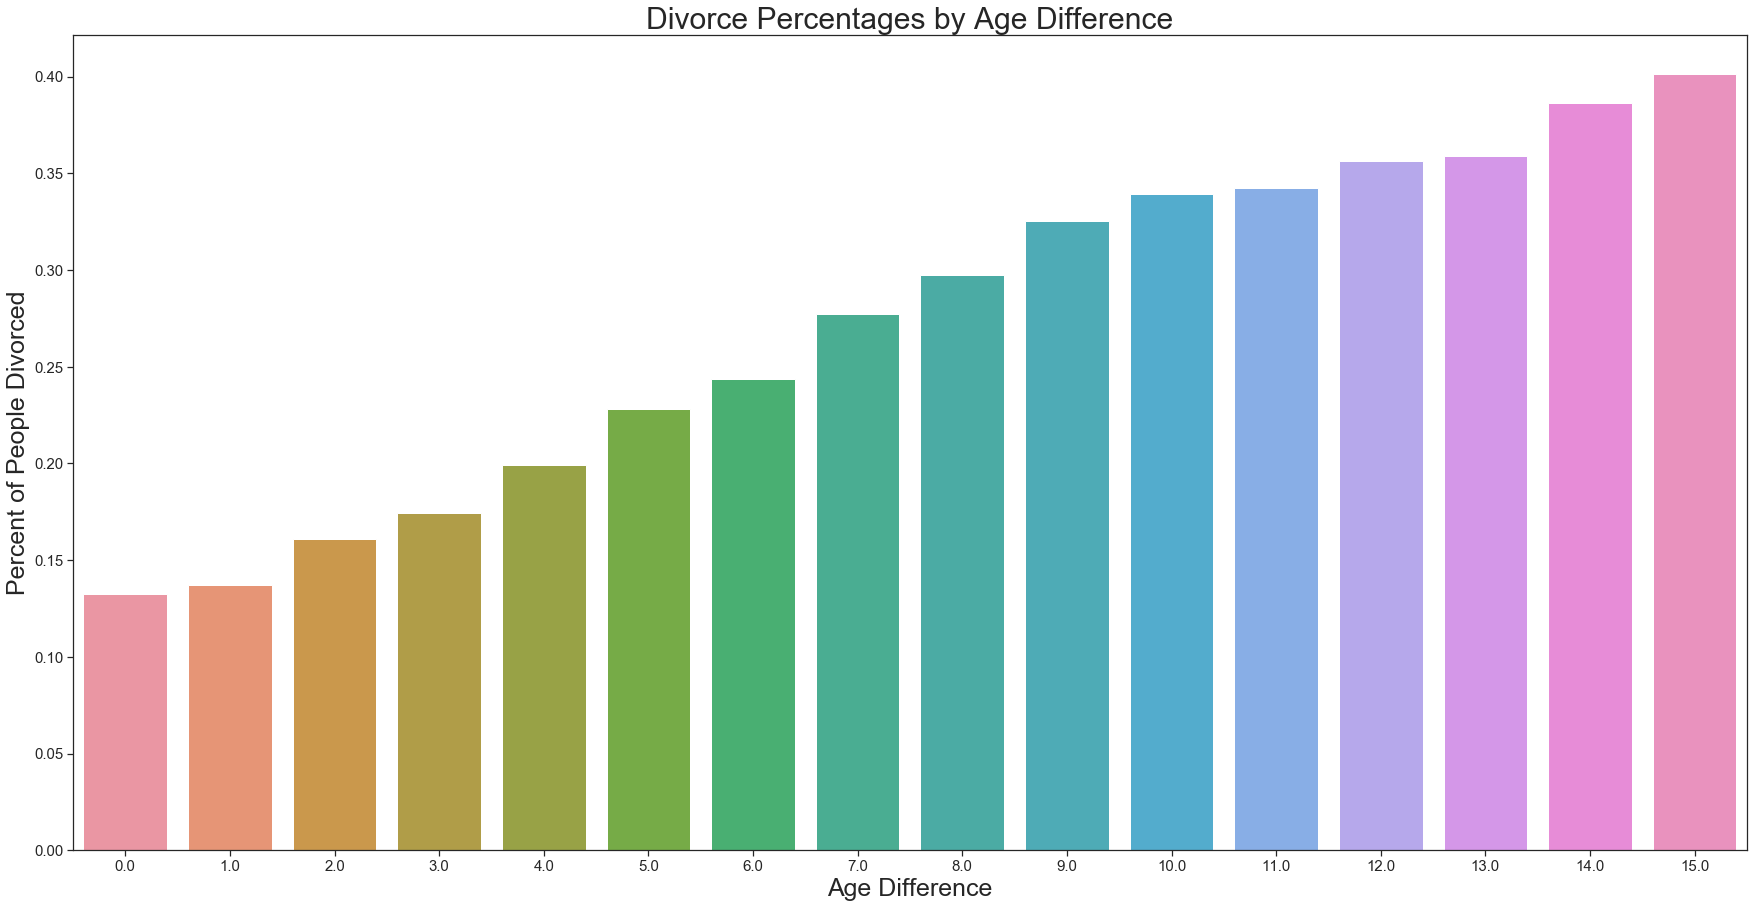

time: 2.73 s


In [133]:
df["Age_Difference"] = abs(df["AGE"] - df["AGE_SP"])
age_diff_groups = df.groupby("Age_Difference").mean()['MARST'][:15]
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(age_diff_groups.index, age_diff_groups)
plot.set_xlabel("Age Difference",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Age Difference", fontsize=30)
plot.tick_params(labelsize=15)

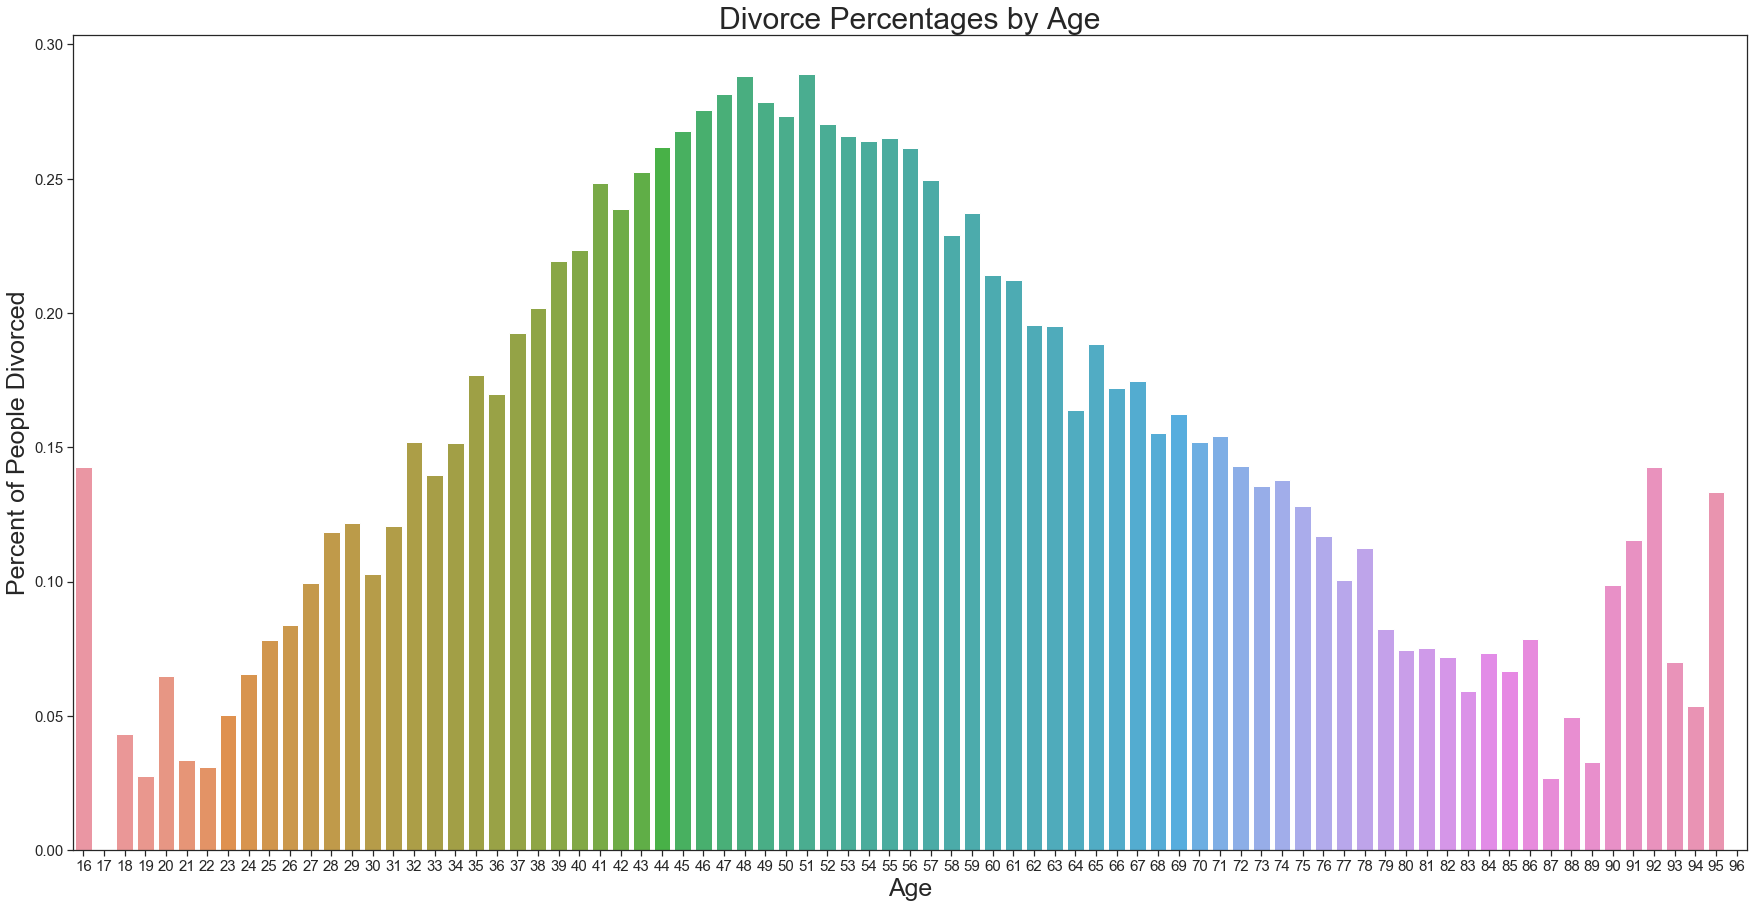

time: 3.58 s


In [129]:
age_groups = df.groupby("AGE").mean()['MARST']
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(age_groups.index, age_groups)
plot.set_xlabel("Age",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Age", fontsize=30)
plot.tick_params(labelsize=15)

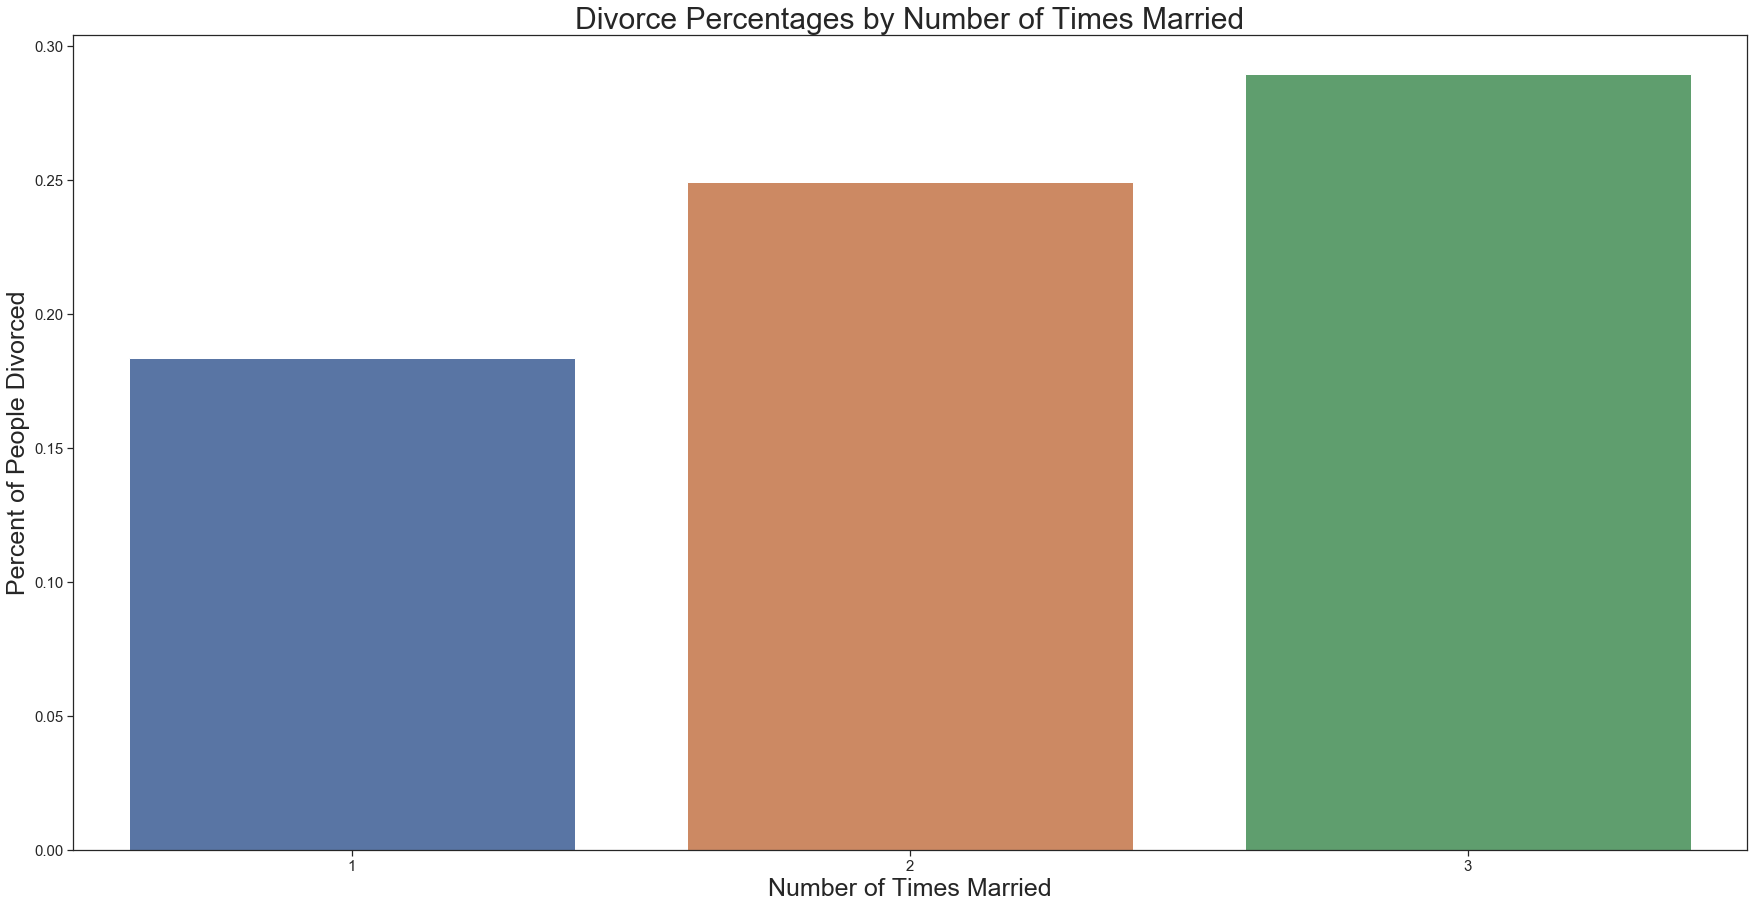

time: 1.69 s


In [130]:
number_time_married_groups = df.groupby("MARRNO").mean()['MARST']
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(30, 15))
plot = sns.barplot(number_time_married_groups.index, number_time_married_groups)
plot.set_xlabel("Number of Times Married",fontsize=25)
plot.set_ylabel("Percent of People Divorced",fontsize=25)
plot.set_title("Divorce Percentages by Number of Times Married", fontsize=30)
plot.tick_params(labelsize=15)